In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import pandas as pd
from matplotlib import cm
import math
import cmath
from PIL import Image
import scipy as sc
from matplotlib.colors import Normalize
plt.rcParams["figure.figsize"] = (11,11)

# Questão 11

In [31]:
# Dados
pi = math.pi
a = 30e-6
ko = 2*pi/(1064e-9)
zvals = [0, 0.9e-2, 1.8e-2]
pvals = np.linspace(-0.4e-3, 0.4e-3, 200, endpoint=True)
c = 3e8

In [32]:
# Função 
def func(p, z, t=0):
    term = np.power(a, 2) + ((z*1j)/(2*ko))
    return (2*a**2*np.exp((-p**2)/(4*term))/(2*term))*np.exp(ko*1j*(z-c*t))

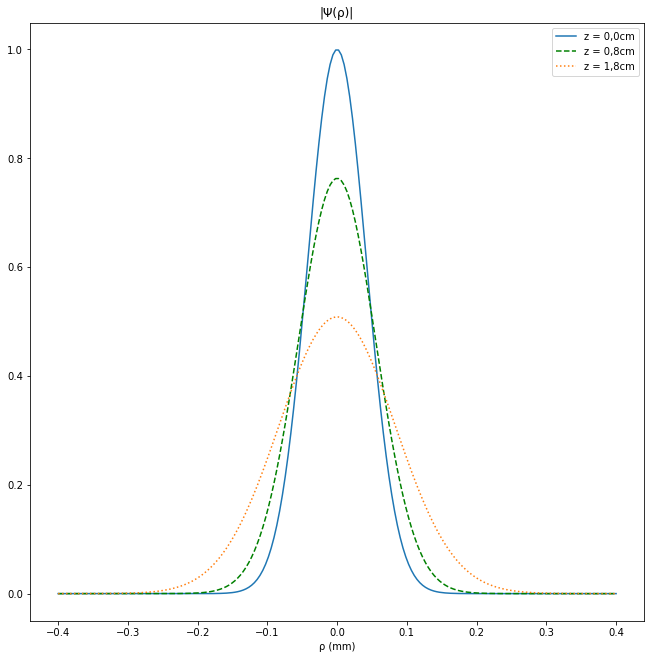

In [33]:
# Plots
Y00 = abs(func(pvals, zvals[0]))  # z = 0.0 cm
Y09 = abs(func(pvals, zvals[1]))  # z = 0.9 cm
Y18 = abs(func(pvals, zvals[2]))  # z = 1.8 cm
xvals = np.linspace(-0.4, 0.4, 200, endpoint=True)
plt.plot(xvals, Y00, label="z = 0,0cm")
plt.plot(xvals, Y09, "--", c="green", label="z = 0,8cm")
plt.plot(xvals, Y18, ':', label="z = 1,8cm")
plt.xlabel("ρ (mm)")
plt.title("|Ψ(ρ)|")
plt.legend()

Text(0.5, 0.92, '|Ψ(ρ,z,t)|')

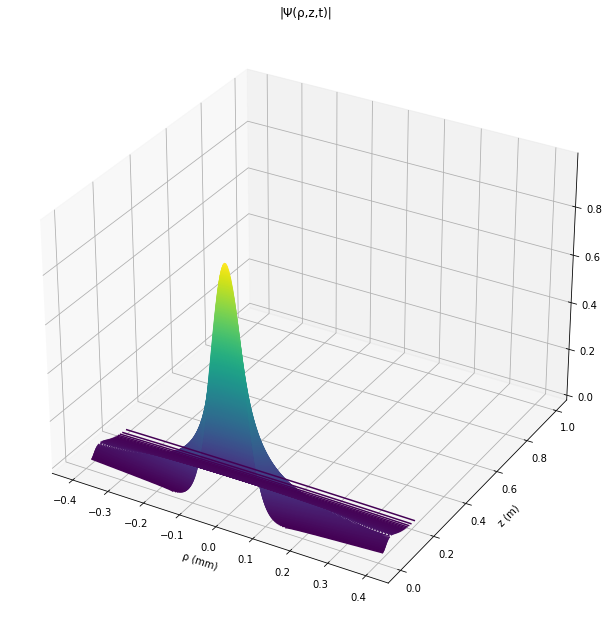

In [52]:
zext = np.linspace(0, 1, 400)
Y = []
pvals = np.linspace(-0.4e-3, 0.4e-3, 200, endpoint=True)
xvals = np.linspace(-0.4, 0.4, 200, endpoint=True)
for z in zext:
    Y.append(abs(func(pvals, z)))
Y = np.array(Y)
#Y = abs(func(pvals, zext))

# plotting
ax = plt.axes(projection="3d")
ax.contour(xvals, zext, Y, 995)
ax.set_xlabel("ρ (mm)")
ax.set_ylabel("z (m)")
ax.set_title("|Ψ(ρ,z,t)|")

## Questão 12

In [65]:
# Função
c = 3*10**8
b = 3*10**-12
def func(p, z, ct=0): 
    term = np.power(a, 2) + ((z*1j)/(2*ko))
    return (a**2*np.exp((-p**2)/(4*term))/term)*np.exp((-((z-ct)**2))/(4*(c**2)*(b**2)))

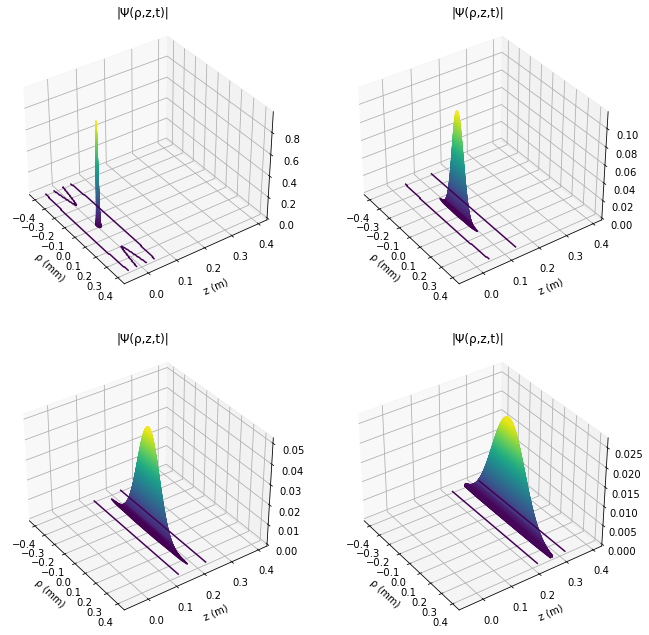

In [70]:
zext = np.linspace(-0.05, 0.4, 200)
pvals = np.linspace(-3e-3, 3e-3, 400, endpoint=True)
xvals = np.linspace(-0.4, 0.4, 400, endpoint=True)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, subplot_kw={'projection': "3d"})

elev=35
azim=-35
roll=0

# ct = 0.0
Y1 = []
for z in zext:
    Y1.append(np.abs(func(pvals, z)))
Y1 = np.array(Y1)

# plotting
ax1.contour(xvals, zext, Y1, 1000)
ax1.set_xlabel("ρ (mm)")
ax1.set_ylabel("z (m)")
ax1.set_title("|Ψ(ρ,z,t)|")
ax1.view_init(elev, azim, roll)

# ct = 0.09
Y2 = []
for z in zext:
    Y2.append(abs(func(pvals, z, ct=0.09)))
Y2 = np.array(Y2)

# plotting
ax2.contour(xvals, zext, Y2, 1000)
ax2.set_xlabel("ρ (mm)")
ax2.set_ylabel("z (m)")
ax2.set_title("|Ψ(ρ,z,t)|")
ax2.view_init(elev, azim, roll)

# ct = 0.18
Y3 = []
for z in zext:
    Y3.append(abs(func(pvals, z, ct=0.18)))
Y3 = np.array(Y3)

# plotting
ax3.contour(xvals, zext, Y3, 1000)
ax3.set_xlabel("ρ (mm)")
ax3.set_ylabel("z (m)")
ax3.set_title("|Ψ(ρ,z,t)|")
ax3.view_init(elev, azim, roll)

# ct = 0.27
Y4 = []
for z in zext:
    Y4.append(abs(func(pvals, z, ct=0.27)))
Y4 = np.array(Y4)

# plotting
ax4.contour(xvals, zext, Y4, 1000)
ax4.set_xlabel("ρ (mm)")
ax4.set_ylabel("z (m)")
ax4.set_title("|Ψ(ρ,z,t)|")
ax4.view_init(elev, azim, roll)

## Questão 21

In [69]:
# constantes
L = 0.5
l1 = L/10
l2 = 3*L/10
l3 = 4*L/10
l4 = 6*L/10
l5 = 7*L/10
l6 = 9*L/10

c = 299792458
w = 2.98 * 10**15
Q = 0.9998 * w / c
N = 20

# função a ser aproximada
def funcF(z):
    if l1 <= z and z <= l2:
        return -4*(z - l1)*(z - l2)/((l2 - l1)**2)
    if l3 <= z and z <= l4:
        return 1
    if l5 <= z and z <= l6:
        return -4*(z - l5)*(z - l6)/((l6 - l5)**2)
    return 0
                
nvals = np.arange(-N, N+1)

# determina valores de F(z)
zvals = np.linspace(0, L, 1000)
Fvalues = np.array([])
for z in zvals:
    Fvalues = np.append(Fvalues, funcF(z))

# funções para os parâmetros A e B
def An(n):
    return 1/L * sc.integrate.quad(lambda z: funcF(z) * np.exp(-1j * 2 * np.pi * n * z /L), 0, L)[0]

def Bn(n):
    return Q + 2 * np.pi * n / L

def kr(n):
    return np.sqrt(w**2 - np.square(Bn(n)))
    
# determina valores de An, Bn e Kr
Avals = np.array([])
Bvals = Bn(nvals)
Kvals = kr(nvals)
for n in nvals:
    Avals = np.append(Avals, An(n))
    

# função final da FW
def psi(z, r, t):
    summ = np.multiply(np.multiply(Avals, sc.special.jv(0, Kvals * r)), np.exp(1j * 2 * np.pi * nvals * z / L))
    return np.exp(- 1j * w * t + 1j * Q * z) * np.sum(summ)

<ipython-input-69-78e58ccab7c2>:35: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/L * sc.integrate.quad(lambda z: funcF(z) * np.exp(-1j * 2 * np.pi * n * z /L), 0, L)[0]


In [72]:
# calcula psi
Psi = []
for z in zvals:
    Psi.append(np.abs(psi(z, 0, 0))**2)

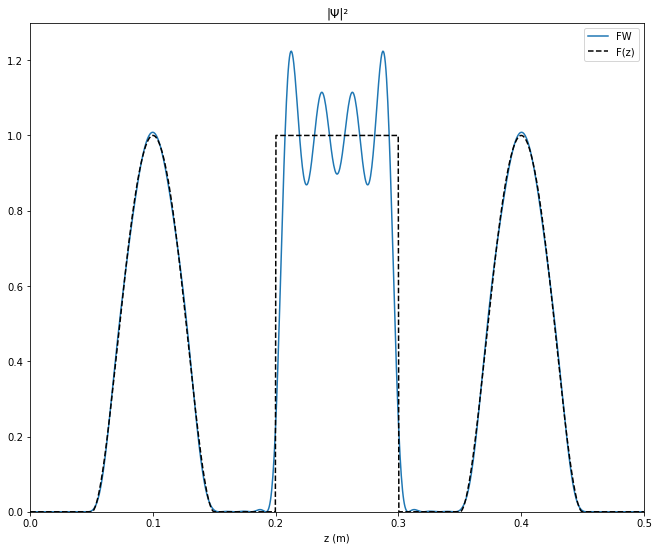

In [73]:
plt.rcParams["figure.figsize"] = (11,9)

fig, ax = plt.subplots()
ax.plot(zvals, Psi, label="FW")
ax.plot(zvals, Fvalues**2, "--", c="black", label="F(z)")
plt.xlabel("z (m)")
plt.title("|Ψ|²")
ax.set_xlim([0, L])
ax.set_ylim([0, 1.3])
plt.legend()
plt.show()

In [140]:
rvals = np.linspace(-5e-4, +5e-4, 1000, endpoint=True)

Psi = np.array([[np.abs(psi(z, r, 0))**2 for r in rvals] for z in zvals])

print(np.max(Psi))

1.0879120164114624e-10


1.0879120164114624e-10


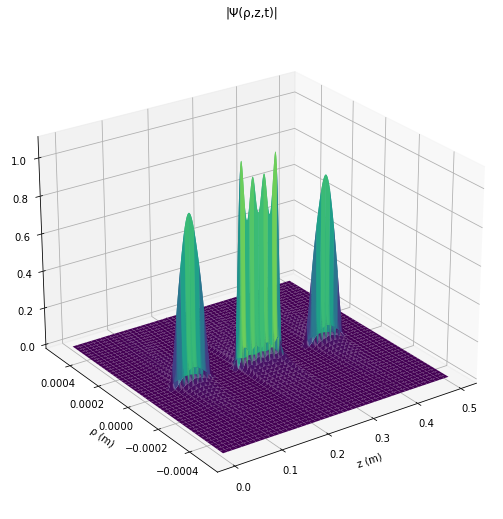

In [143]:
X, Y = np.meshgrid(zvals, rvals)
print(np.max(Psi))
norm = Normalize(0, 5*10**-11)
Z = np.transpose(np.array(Psi))
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, cmap=cm.viridis, norm=norm)
ax.set_xlabel("z (m)")
ax.set_ylabel("ρ (m)")
ax.set_title("|Ψ(ρ,z,t)|")
ax.view_init(elev, azim, roll)

## Questão 22

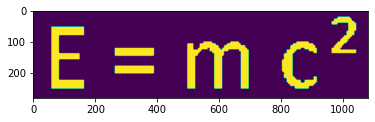

In [2]:
image_path = "imagemE.png"
image = Image.open(image_path)
gray_image = image.convert("L") # convert to grayscale

# binarize the image
threshold = 128
binary_image = np.array(gray_image) > threshold
plt.imshow(binary_image)
plt.show()

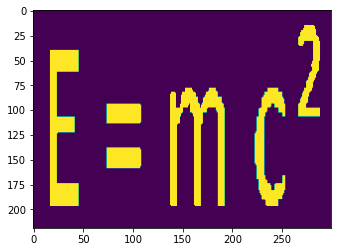

In [37]:
# constantes
L = 0.06
c = 299792458
w = 2.9805 * 10**15
Q = 0.9998 * w / c
N = 15
Dx = 48.26 * 10**-6 * 1.5
R = 0.0158

# função a ser aproximada
def funcF(x, z):
    return binary_image[int(x * (binary_image.shape[0] - 1) / R) - 1, int(z * (binary_image.shape[1] - 1) / L)]
                
nvals = np.arange(-N, N+1)

# determina valores de F(z)
zvals = np.linspace(0, L, 300)
xvals = np.arange(0, R, Dx)
Fvals = np.array([[funcF(x, z) for z in zvals] for x in xvals], dtype=np.float32)

# funções para os parâmetros A e B
def An(x, n):
    return 1/300 * np.sum(Fvals[int(x / Dx)] * np.exp(1j * 2 * np.pi * n * zvals /L))
    #return 1/L * sc.integrate.quad(lambda z: funcF(x, z) * np.exp(1j * 2 * np.pi * n * z /L), 0, L)[0]

def Bn(n):
    return Q + 2 * np.pi * n / L

def kr(n):
    return np.sqrt(w**2 - np.square(Bn(n)))

# determina valores de An, Bn e Kr
Avals = np.array([[An(x, n) for n in nvals] for x in xvals], dtype=np.complex64)
Bvals = Bn(nvals)
Kvals = kr(nvals)

rvals = np.linspace(0, R, 250)

# função final da FW
def psi(z, r, x):
    summ = Avals[int(x / Dx)] * sc.special.jv(0, Kvals * (r - x)) * np.exp(-1j * Bvals * z)
    return np.sum(summ)

plt.imshow(Fvals)
plt.show()

In [24]:

Z, R_grid, X_grid = np.meshgrid(zvals, rvals, xvals, indexing="ij")

def psi_vectorized(Z, R_grid, X_grid):
    # Adjust dimensions for broadcasting
    Kvals_expanded = Kvals[:, None, None, None]  # Shape: (n, 1, 1, 1)
    R_diff = R_grid[None, :, :, :] - X_grid[None, :, :, :]  # Shape: (1, z, r, x)
    
    # Compute terms
    Jvals = sc.special.jv(0, Kvals_expanded * R_diff)  # Shape: (n, z, r, x)
    expvals = np.exp(-1j * Bvals[:, None, None, None] * Z[None, :, :, :], dtype=np.complex64)  # Shape: (n, z, r, x)
    
    # Multiply Avals and sum over nvals axis
    A_expanded = np.array(Avals[:, :, None, None], dtype=np.complex64)  # Shape: (x, n, 1, 1)
    A_Jvals = np.array(A_expanded.transpose(1, 2, 3, 0) * Jvals, dtype=np.complex64)  # Align dimensions for Avals and Jvals
    
    summ = np.sum(A_Jvals * expvals, axis=0, dtype=np.complex64)  # Sum over nvals (axis 0)
    return summ  # Shape: (z, r, x)

Psi = np.abs(psi_vectorized(Z, R_grid, X_grid))**2

print(Psi.shape)

(300, 250, 219)


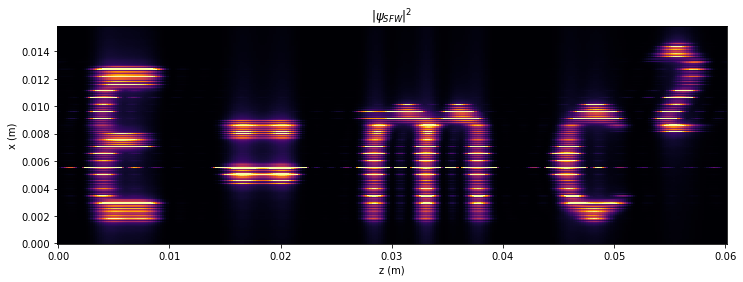

In [60]:
out = np.sum(Psi, axis=2)

plt.rcParams["figure.figsize"] = (12,4)
plt.pcolormesh(zvals, np.flip(rvals), out.T, cmap='inferno', norm=Normalize(0, 3*10**-11))
plt.title(r'$|\psi_{SFW}|^2$')
plt.xlabel('z (m)')
plt.ylabel('x (m)')
plt.show()

(219, 300)


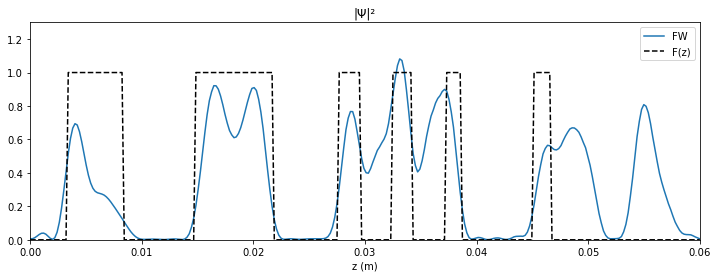

In [58]:
fig, ax = plt.subplots()
print(Fvals.shape)
ax.plot(zvals, out.T[int(xvals.size/2)] * 10**11, label="FW")
ax.plot(zvals, Fvals[int(xvals.size/2)]**2, "--", c="black", label="F(z)")
plt.xlabel("z (m)")
plt.title("|Ψ|²")
ax.set_xlim([0, L])
ax.set_ylim([0, 1.3])
plt.legend()
plt.show()

In [33]:
# função a ser aproximada
def funcFold(z):
    return funcF(R/2, z)
                
nvals = np.arange(-N, N+1)

# determina valores de F(z)
zvals = np.linspace(0, L, 250)
Fvalues = np.array([])
for z in zvals:
    Fvalues = np.append(Fvalues, funcFold(z))

# funções para os parâmetros A e B
def An(n):
    return 1/250 * np.sum(Fvalues * np.exp(-1j * 2 * np.pi * n * zvals /L))

def Bn(n):
    return Q + 2 * np.pi * n / L

def kr(n):
    return np.sqrt(w**2 - np.square(Bn(n)))
    
# determina valores de An, Bn e Kr
Avals = np.array([])
Bvals = Bn(nvals)
Kvals = kr(nvals)
for n in nvals:
    Avals = np.append(Avals, An(n))
    

# função final da FW
def psi(z, r, t):
    summ = np.multiply(np.multiply(Avals, sc.special.jv(0, Kvals * (r - R/2))), np.exp(1j * Bvals * z))
    return np.sum(summ)

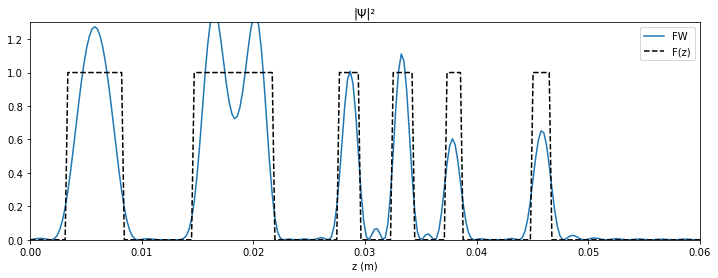

In [34]:
Psi2 = []
for z in zvals:
    Psi2.append(np.abs(psi(z, R/2, 0))**2)

fig, ax = plt.subplots()
ax.plot(zvals, Psi2, label="FW")
ax.plot(zvals, Fvalues**2, "--", c="black", label="F(z)")
plt.xlabel("z (m)")
plt.title("|Ψ|²")
ax.set_xlim([0, L])
ax.set_ylim([0, 1.3])
plt.legend()
plt.show()